<a href="https://colab.research.google.com/github/AnjanaAnoop/Web-Scraping/blob/main/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary libraries
!pip install bs4
!pip install requests

In [ ]:
#Import all necessary libraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
response = requests.get(url, headers={'User-Agent': "Mozilla/5.0"})

# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(response.text,'html.parser')

# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [ ]:
# Write Your Code here
# Initializing an empty list 'movie_urls'
movie_urls = []

# Finding all the 'a' tags with the class name 'title-list-grid__item--link'
movie_links = soup.find_all('a', class_='title-list-grid__item--link')

# Changing the urls to suitable format
movie_urls = ['https://www.justwatch.com' + link['href'] for link in movie_links]

# Iterating through each URL and printing it
for url in movie_urls:
  print(url)

https://www.justwatch.com/in/movie/animal-2022
https://www.justwatch.com/in/movie/salaar
https://www.justwatch.com/in/movie/12th-fail
https://www.justwatch.com/in/movie/sam-bahadur
https://www.justwatch.com/in/movie/aquaman-and-the-lost-kingdom
https://www.justwatch.com/in/movie/dunki
https://www.justwatch.com/in/movie/ssmb-28
https://www.justwatch.com/in/movie/hanu-man
https://www.justwatch.com/in/movie/oppenheimer
https://www.justwatch.com/in/movie/anyone-but-you
https://www.justwatch.com/in/movie/the-marvels
https://www.justwatch.com/in/movie/neru
https://www.justwatch.com/in/movie/sapta-sagaradaache-ello-side-b
https://www.justwatch.com/in/movie/nani30
https://www.justwatch.com/in/movie/captain-miller
https://www.justwatch.com/in/movie/fighter-2022
https://www.justwatch.com/in/movie/the-kerala-story
https://www.justwatch.com/in/movie/jawan
https://www.justwatch.com/in/movie/devil-2023
https://www.justwatch.com/in/movie/parking-2023
https://www.justwatch.com/in/movie/migration
https

## **Scrapping Movie Title**

In [ ]:
# Write Your Code here
# Initailizing an empty list 'movie_titles'
movie_titles = []

# Finding all the 'div' tags with class name 'title-poster'
div_tags = soup.find_all('div',class_= 'title-poster')

# Iterating through all the 'div' tags
for div_tag in div_tags :
  # Finding the 'img' tag
  img_tag = div_tag.find('img')
  # Getting the value of the 'alt' attribute of the img tag to scrape the movie title
  movie_titles.append(img_tag.get('alt'))
# Printing the movie titles
print(movie_titles)

['Animal', 'Salaar', '12th Fail', 'Sam Bahadur', 'Aquaman and the Lost Kingdom', 'Dunki', 'Guntur Kaaram', 'Hanu-Man', 'Oppenheimer', 'Anyone But You', 'The Marvels', 'Neru', 'Sapta Sagaradaache Ello: Side B', 'Hi Nanna', 'Captain Miller', 'Fighter', 'The Kerala Story', 'Jawan', 'Devil', 'Parking', 'Migration', 'Killers of the Flower Moon', 'The Beekeeper', 'Tiger 3', 'Mission: Impossible - Dead Reckoning Part One', 'Guthlee Ladoo', 'Ayalaan', 'Anatomy of a Fall', 'Society of the Snow', 'Dune', 'Barbie', 'Saindhav', 'Poor Things', 'Lift', 'Joram', 'Saltburn', 'Past Lives', 'Interstellar', 'Joe', 'Talk to Me', 'Kaathal – The Core', 'Bhakshak', 'Pindam', '365 Days', 'Wonka', 'Leo', '777 Charlie', 'Merry Christmas', 'Dada', "Harry Potter and the Philosopher's Stone", 'Mangalavaaram', 'Blue Beetle', 'The Wolf of Wall Street', 'Zara Hatke Zara Bachke', 'Mad Max: Fury Road', 'Badland Hunters', 'Extra Ordinary Man', 'Upgraded', 'The Holdovers', 'Rocky Aur Rani Kii Prem Kahaani', 'Yaariyan 2',

## **Scrapping release Year**

In [ ]:
# Write Your Code here
# Initailizing an empty list 'release_years'
release_years=[]

# Iterating through each movie URL
for url in movie_urls:
  # Sending an HTTP GET request to the URL
  film_response = requests.get(url, headers={'User-Agent': "Mozilla/5.0"})
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  film_soup = BeautifulSoup(film_response.text,'html.parser')
  # Finding the 'span' tag with the class name 'text-muted' to scrape the release year
  year = film_soup.find('span', class_='text-muted').get_text(strip=True)
  # Check if the year is found
  if year:
    release_years.append(year.strip("()"))
  else:
    release_years.append(np.nan)
# Printing the release years
print(release_years)

['2023', '2023', '2023', '2023', '2023', '2023', '2024', '2024', '2023', '2023', '2023', '2023', '2023', '2023', '2024', '2024', '2023', '2023', '2023', '2023', '2023', '2023', '2024', '2023', '2023', '2023', '2024', '2023', '2023', '2021', '2023', '2024', '2023', '2024', '2023', '2023', '2023', '2014', '2023', '2023', '2023', '2024', '2023', '2020', '2023', '2023', '2022', '2024', '2023', '2001', '2023', '2023', '2013', '2023', '2015', '2024', '2023', '2024', '2023', '2023', '2023', '2023', '2019', '2023', '2010', '2023', '2023', '2023', '2023', '2023', '2023', '2023', '2024', '2023', '2023', '2019', '2023', '2023', '2018', '2023', '2009', '2023', '2017', '2023', '2018', '2024', '2023', '2024', '2023', '2023', '2018', '2011', '2023', '2023', '2023', '2019', '2006', '2022', '2023', '2024']


## **Scrapping Genres**

In [ ]:
# Write Your Code here
# Initailizing an empty list 'genres'
genres=[]

# Iterating through each movie URL
for url in movie_urls:
  # Sending an HTTP GET request to the URL
  film_response = requests.get(url, headers={'User-Agent': "Mozilla/5.0"})
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  film_soup = BeautifulSoup(film_response.text,'html.parser')
  # Finding the 'h3' tag with the class name 'detail-infos__subheading' and string 'Genres' to scrape the genre of each movie
  genre_element = film_soup.find('h3', class_='detail-infos__subheading', string='Genres')
  # Check if the genre_element is found
  if genre_element:
    # Finding the 'div' tag with the class name 'detail-infos__value' which is the next sibling of the 'h3' tag found above
    genre = genre_element.find_next_sibling('div', class_='detail-infos__value')
    # Check if the genre is found
    if genre:
        genres.append(genre.text.strip())
    else:
        genres.append(np.nan)
  else:
    genres.append(np.nan)
# Printing the genres
print(genres)

['Drama, Action & Adventure, Crime, Mystery & Thriller', 'Drama, Mystery & Thriller, Action & Adventure, Crime', 'Drama', 'Drama, War & Military, History', 'Fantasy, Action & Adventure, Science-Fiction', 'Comedy, Drama', 'Kids & Family, Action & Adventure, Drama', 'Comedy, Fantasy, Action & Adventure', 'Drama, History', 'Comedy, Romance', 'Action & Adventure, Science-Fiction, Fantasy', 'Mystery & Thriller, Drama', 'Action & Adventure, Drama, Romance', 'Kids & Family, Romance, Drama', 'Action & Adventure, Drama, Mystery & Thriller', 'Action & Adventure, Mystery & Thriller, War & Military', 'Drama', 'Mystery & Thriller, Action & Adventure', 'Mystery & Thriller, Action & Adventure, Drama', 'Mystery & Thriller, Drama', 'Comedy, Kids & Family, Animation', 'Crime, History, Drama, Romance, Western', 'Mystery & Thriller, Drama, Action & Adventure', 'Mystery & Thriller, Action & Adventure', 'Action & Adventure, Mystery & Thriller', 'Drama', 'Action & Adventure, Science-Fiction', 'Crime, Drama, 

## **Scrapping IMDB Rating**

In [ ]:
# Write Your Code here
# Initailizing an empty list 'imdb_ratings'
imdb_ratings=[]

# Iterating through each movie URL
for url in movie_urls:
  # Sending an HTTP GET request to the URL
  film_response = requests.get(url, headers={'User-Agent': "Mozilla/5.0"})
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  film_soup = BeautifulSoup(film_response.text,'html.parser')
  # Finding the 'img' tag with the alt attribute 'IMDB'.
  img_tag = film_soup.find('img', alt='IMDB')
  # Check if the img_tag is found
  if img_tag:
    # Finding the 'span' tag which is the next sibling of this 'img' tag.
    span_tag = img_tag.find_next_sibling('span')
    # Check if the span_tag is found
    if span_tag:
      # Get the text of the 'span' tag
      rating_text = span_tag.get_text(strip=True)
      imdb_ratings.append(rating_text.split()[0])
    else:
      imdb_ratings.append(np.nan)
  else:
    imdb_ratings.append(np.nan)
# Printing the imdb ratings
print(imdb_ratings)

['6.4', '6.5', '9.1', '7.9', '5.7', '7.2', '5.6', '8.5', '8.4', '6.4', '5.6', '7.6', '8.1', '8.2', '6.9', '7.4', '7.1', '7.0', '6.7', '7.9', '6.7', '7.7', '6.4', '5.8', '7.7', '7.8', '6.2', '7.8', '7.9', '8.0', '6.9', '5.1', nan, '5.5', '6.8', '7.0', '7.9', '8.7', '7.6', '7.1', '7.6', '7.3', '8.3', '3.3', '7.1', '7.2', '8.8', '7.8', '8.2', '7.6', '6.7', '6.0', '8.2', '6.4', '8.1', '6.0', '5.1', '6.1', '8.0', '6.6', '6.0', '6.0', '8.2', '7.5', '8.8', '8.3', '8.0', '7.6', '6.3', '8.1', '6.4', '8.3', '7.8', '6.4', '6.8', '6.1', '7.0', '5.2', '6.8', '7.0', '8.4', '6.9', '8.0', '6.7', '8.2', '6.4', '3.4', '7.4', '7.9', '5.6', '8.5', '7.7', '5.8', '7.7', '7.2', '8.4', '8.0', '7.8', '6.6', '8.1']


## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here
# Initailizing an empty list 'run_times'
run_times=[]

# Iterating through each movie URL
for url in movie_urls:
  # Sending an HTTP GET request to the URL
  film_response = requests.get(url, headers={'User-Agent': "Mozilla/5.0"})
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  film_soup = BeautifulSoup(film_response.text,'html.parser')
  # Finding the 'h3' tag with the class name 'detail-infos__subheading' and string 'Runtime'
  runtime_element = film_soup.find('h3', class_='detail-infos__subheading', string='Runtime')
  # Check if the runtime_element is found
  if runtime_element:
    # Finding the 'div' tag with class name 'detail-infos__value' which is the next sibling of 'h3' tag
    runtime = runtime_element.find_next_sibling('div', class_='detail-infos__value')
    # Check if the runtime is found
    if runtime:
        run_times.append(runtime.text.strip())
    else:
        run_times.append(np.nan)
  else:
    run_times.append(np.nan)
# Printing the run time
print(run_times)

['3h 24min', '2h 55min', '2h 26min', '2h 30min', '2h 4min', '2h 40min', '2h 39min', '2h 39min', '3h 0min', '1h 43min', '1h 45min', '2h 30min', '2h 28min', '2h 35min', '2h 37min', '2h 47min', '2h 18min', '2h 49min', '2h 24min', '2h 7min', '1h 33min', '3h 26min', '1h 45min', '2h 34min', '2h 44min', '1h 45min', '2h 35min', '2h 32min', '2h 24min', '2h 35min', '1h 54min', '2h 18min', '2h 21min', '1h 46min', '1h 57min', '2h 11min', '1h 46min', '2h 49min', '2h 27min', '1h 35min', '1h 52min', '2h 14min', '2h 38min', '1h 54min', '1h 56min', '2h 43min', '2h 46min', '2h 24min', '2h 15min', '2h 32min', '2h 25min', '2h 8min', '3h 0min', '2h 20min', '2h 0min', '1h 49min', '2h 35min', '1h 45min', '2h 13min', '2h 48min', '2h 28min', '1h 59min', '2h 18min', '1h 39min', '2h 28min', '2h 20min', '1h 54min', '2h 15min', '1h 59min', '2h 52min', '2h 38min', '2h 5min', '2h 5min', '1h 38min', '2h 14min', '2h 0min', '2h 38min', '2h 48min', '2h 23min', '2h 8min', '2h 32min', '1h 45min', '2h 44min', '2h 24min', '

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here
# Initailizing an empty list 'new_age_rating'
new_age_rating=[]

# Iterating through each movie URL
for url in movie_urls:
  # Sending an HTTP GET request to the URL
  film_response = requests.get(url, headers={'User-Agent': "Mozilla/5.0"})
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  film_soup = BeautifulSoup(film_response.text,'html.parser')
  # Finding the 'h3' tag with the class name 'detail-infos__subheading' and string 'Age rating'
  age_rating_element = film_soup.find('h3', class_='detail-infos__subheading', string='Age rating')
  # Check if the age_rating_element is found
  if age_rating_element:
    # Extract the rating by finding the 'div' tag which is the next sibling of the 'h3' tag
    rating = age_rating_element.find_next_sibling('div', class_='detail-infos__value')
    # Check if the rating is found
    if rating:
        new_age_rating.append(rating.text.strip())
    else:
        new_age_rating.append(np.nan)
  else:
    new_age_rating.append(np.nan)
# Printing the age ratings
print(new_age_rating)

['A', 'A', nan, 'UA', nan, nan, 'UA', 'UA', 'UA', nan, nan, 'UA', 'UA', 'U', 'UA', 'UA', 'A', 'UA', nan, 'UA', nan, 'A', nan, nan, nan, nan, 'U', nan, nan, 'UA', 'UA', 'UA', nan, nan, 'UA', nan, 'UA', nan, nan, nan, 'UA', 'A', 'UA', nan, 'U', 'UA', 'UA', 'UA', 'U', 'U', nan, nan, 'A', 'UA', 'A', nan, nan, nan, nan, nan, 'UA', 'A', 'UA', nan, 'UA', 'UA', 'UA', nan, 'A', 'UA', nan, nan, nan, nan, nan, nan, 'UA', 'UA', 'UA', nan, 'A', nan, 'A', 'A', 'UA', nan, 'UA', 'UA', nan, 'A', 'U', 'UA', 'UA', nan, nan, 'A', 'A', 'UA', nan, nan]


## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here
# Initailizing an empty list 'production_countries'
production_countries=[]

# Iterating through each movie URL
for url in movie_urls:
  # Sending an HTTP GET request to the URL
  film_response = requests.get(url, headers={'User-Agent': "Mozilla/5.0"})
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  film_soup = BeautifulSoup(film_response.text,'html.parser')
  # Finding the 'h3' tag with the class name 'detail-infos__subheading' and string ' Production country '
  prod_country_element = film_soup.find('h3', class_='detail-infos__subheading', string=' Production country ')
  # Check if the prod_country_element is found
  if prod_country_element:
    # Extract the production country by finding the 'div' tag which is the next sibling of the 'h3' tag
    prod_country = prod_country_element.find_next_sibling('div', class_='detail-infos__value')
    # Check if the prod_country is found
    if prod_country:
        production_countries.append(prod_country.text.strip())
    else:
        production_countries.append(np.nan)
  else:
    production_countries.append(np.nan)
# Printing the production countries
print(production_countries)

['India', 'India', 'India', 'India', 'United States', 'India', 'India', 'India', 'United States, United Kingdom', 'Australia, United States', 'United States', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'Canada, France, United States', 'United States', 'United Kingdom, United States', 'India', 'United States', 'India', 'India', 'France', 'Spain, United States', 'United States', 'United Kingdom, United States', 'India', 'Ireland, United Kingdom, United States', 'United States', 'India', 'United Kingdom, United States', 'United States, South Korea', 'United Kingdom, United States', 'India', 'Australia, United Kingdom', 'India', 'India', 'India', 'Poland', 'United Kingdom, United States', 'India', 'India', 'India', 'India', 'United Kingdom, United States', 'India', 'United States', 'United States', 'India', 'Australia, United States', 'South Korea', 'India', 'United Kingdom, United States', 'United States', 'India', 'India', 'India', 'India', 'India', 

## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
# Initailizing an empty list 'streaming_details'
streaming_details=[]
for url in movie_urls:
  # Sending an HTTP GET request to the URL
  film_response = requests.get(url, headers={'User-Agent': "Mozilla/5.0"})
   # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  film_soup = BeautifulSoup(film_response.text,'html.parser')
  # Find the div element with class "buybox-row stream"
  div_element = film_soup.find('div', class_='buybox-row stream')
  # Check if the div element is found
  if div_element:
    # Find the img tag inside the div element
    img_tag = div_element.find('img')
    # Check if the img tag is found
    if img_tag:
       # Get the value of the alt attribute and append to streaming_details list
        streaming_details.append(img_tag.get('alt'))
    else:
        streaming_details.append(np.nan)
  else:
    streaming_details.append(np.nan)
# Printing the list streaming_details
print(streaming_details)

['Netflix', 'Netflix', 'Hotstar', 'Zee5', nan, 'Netflix', 'Netflix', nan, nan, nan, 'Hotstar', 'Hotstar', 'Amazon Prime Video', 'Netflix', 'Amazon Prime Video', nan, nan, 'Netflix', 'Amazon Prime Video', 'Hotstar', nan, 'Apple TV Plus', nan, 'Amazon Prime Video', 'Amazon Prime Video', 'Amazon Prime Video', 'Sun Nxt', nan, 'Netflix', 'Netflix', 'Jio Cinema', 'Amazon Prime Video', nan, 'Netflix', nan, nan, 'Lionsgate Play', 'Netflix', nan, 'Amazon Prime Video', 'Amazon Prime Video', 'Netflix', 'Amazon Prime Video', 'Netflix', nan, 'Netflix', 'Voot', nan, 'Amazon Prime Video', 'Jio Cinema', 'Hotstar', 'Jio Cinema', 'Lionsgate Play', nan, 'Amazon Prime Video', 'Netflix', nan, 'Amazon Prime Video', nan, 'Amazon Prime Video', nan, 'Netflix', 'Zee5', 'Netflix', 'Netflix', 'Hotstar', 'Amazon Prime Video', 'Netflix', 'Apple TV Plus', 'Netflix', nan, nan, nan, 'Amazon Prime Video', 'Hotstar', 'Hotstar', 'Amazon Prime Video', 'Zee5', 'Netflix', nan, 'Amazon Prime Video', 'Netflix', 'Netflix', 'Ji

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here
# Creating the movie dataframe
movie_df = pd.DataFrame({'Movie': movie_titles, 'URL': movie_urls, 'Release Year': release_years, 'Genre': genres, 'IMDB Rating': imdb_ratings,'Runtime': run_times, 'Age Rating': new_age_rating,'Production Country': production_countries, 'Streaming Details': streaming_details})
print(movie_df)


                               Movie  \
0                             Animal   
1                             Salaar   
2                          12th Fail   
3                        Sam Bahadur   
4       Aquaman and the Lost Kingdom   
..                               ...   
95                             Joker   
96                     Blood Diamond   
97                        The Batman   
98                            Antony   
99  Teri Baaton Mein Aisa Uljha Jiya   

                                                  URL Release Year  \
0      https://www.justwatch.com/in/movie/animal-2022         2023   
1           https://www.justwatch.com/in/movie/salaar         2023   
2        https://www.justwatch.com/in/movie/12th-fail         2023   
3      https://www.justwatch.com/in/movie/sam-bahadur         2023   
4   https://www.justwatch.com/in/movie/aquaman-and...         2023   
..                                                ...          ...   
95      https://www.justwatch

## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here
# Initializing an empty list 'tv_show_urls'
tv_show_urls = []

# Finding all the 'a' tags with the class name 'title-list-grid__item--link'
tv_show_links = soup.find_all('a', class_='title-list-grid__item--link')

# Changing the urls to suitable format
tv_show_urls = ['https://www.justwatch.com' + link['href'] for link in tv_show_links]

# Iterating through each URL and printing it
for url in tv_show_urls:
  print(url)

https://www.justwatch.com/in/tv-show/indian-police-force
https://www.justwatch.com/in/tv-show/true-detective
https://www.justwatch.com/in/tv-show/game-of-thrones
https://www.justwatch.com/in/tv-show/mirzapur
https://www.justwatch.com/in/tv-show/panchayat
https://www.justwatch.com/in/tv-show/jack-reacher
https://www.justwatch.com/in/tv-show/death-and-other-details
https://www.justwatch.com/in/tv-show/solo-leveling-2024
https://www.justwatch.com/in/tv-show/bigg-boss
https://www.justwatch.com/in/tv-show/the-legend-of-hanuman
https://www.justwatch.com/in/tv-show/yellowstone
https://www.justwatch.com/in/tv-show/jujutsu-kaisen
https://www.justwatch.com/in/tv-show/mr-and-mrs-smith
https://www.justwatch.com/in/tv-show/farzi
https://www.justwatch.com/in/tv-show/the-last-of-us
https://www.justwatch.com/in/tv-show/superman-and-lois
https://www.justwatch.com/in/tv-show/killer-soup
https://www.justwatch.com/in/tv-show/berlin
https://www.justwatch.com/in/tv-show/mastram
https://www.justwatch.com/in/

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here
# Initailizing an empty list 'tv_show_titles'
tv_show_titles = []

# Finding all the 'div' tags with class name 'title-poster'
div_tags = soup.find_all('div',class_= 'title-poster')

# Iterating through all the 'div' tags
for div_tag in div_tags :
  # Finding the 'img' tag
  img_tag = div_tag.find('img')
  # Getting the value of the 'alt' attribute of the img tag to scrape the tv show title
  tv_show_titles.append(img_tag.get('alt'))
# Printing the tv show titles
print(tv_show_titles)

['Indian Police Force', 'True Detective', 'Game of Thrones', 'Mirzapur', 'Panchayat', 'Reacher', 'Death and Other Details', 'Solo Leveling', 'Bigg Boss', 'The Legend of Hanuman', 'Yellowstone', 'Jujutsu Kaisen', 'Mr. & Mrs. Smith', 'Farzi', 'The Last of Us', 'Superman & Lois', 'Killer Soup', 'Berlin', 'Mastram', 'Maharani', 'Money Heist', 'The Bear', 'Griselda', 'Aarya', 'Fargo', 'Masters of the Air', 'Halo', 'Monarch: Legacy of Monsters', 'Ek Thi Begum', 'The Freelancer', 'Love Never Lies: Poland', 'Marry My Husband', 'Loki', 'Aashram', 'One Day', 'Shark Tank India', 'My Demon', 'Scam 1992', 'Succession', 'House', 'Gandii Baat', 'The Railway Men - The Untold Story of Bhopal 1984', 'ted', 'Breaking Bad', 'Expats', 'Percy Jackson and the Olympians', 'The Family Man', 'Flames', 'Gullak', 'Dark Desire', 'Taaza Khabar', 'Spartacus', 'Euphoria', 'Lucifer', 'Modern Family', 'House of the Dragon', 'Scam 2003: The Telgi Story', 'Mashle: Magic and Muscles', "Death's Game", 'Fool Me Once', 'Deha

## **Fetching Release Year**

In [ ]:
# Write Your Code here
# Initailizing an empty list 'tv_release_years'
tv_release_years=[]

# Iterating through each tv show URL
for url in tv_show_urls:
  # Sending an HTTP GET request to the URL
  tv_show_response = requests.get(url, headers={'User-Agent': "Mozilla/5.0"})
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  tv_soup = BeautifulSoup(tv_show_response.text,'html.parser')
  # Finding the 'span' tag with the class name 'text-muted' to scrape the release year
  year = tv_soup.find('span', class_='text-muted').get_text(strip=True)
  # Check if the year is found
  if year:
    tv_release_years.append(year.strip("()"))
  else:
    tv_release_years.append(np.nan)
# Printing the release years
print(tv_release_years)

['2024', '2014', '2011', '2018', '2020', '2022', '2024', '2024', '2006', '2021', '2018', '2020', '2024', '2023', '2023', '2021', '2024', '2023', '2020', '2021', '2017', '2022', '2024', '2020', '2014', '2024', '2022', '2023', '2020', '2023', '2022', '2024', '2021', '2020', '2024', '2021', '2023', '2020', '2018', '2004', '2018', '2023', '2024', '2008', '2024', '2023', '2019', '2018', '2019', '2020', '2023', '2010', '2019', '2016', '2009', '2022', '2023', '2023', '2023', '2024', '2023', '2021', '2021', '2013', '2019', '2019', '2015', '2024', '2024', '2018', '2015', '2020', '2007', '2018', '2010', '2024', '2016', '2010', '2020', '2023', '2023', '2023', '2022', '2002', '2022', '2009', '2004', '2024', '2018', '2019', '2017', '2011', '2024', '2014', '2020', '2023', '2009', '2013', '2022', '2011']


## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
# Initailizing an empty list 'tv_genres'
tv_genres=[]
# Iterating through each tv show URL
for url in tv_show_urls:
  # Sending an HTTP GET request to the URL
  tv_show_response = requests.get(url, headers={'User-Agent': "Mozilla/5.0"})
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  tv_soup = BeautifulSoup(tv_show_response.text,'html.parser')
  # Finding the 'h3' tag with the class name 'detail-infos__subheading' and string 'Genres' to scrape the genre of each tv show
  genre_element = tv_soup.find('h3', class_='detail-infos__subheading', string='Genres')
  # Check if the genre_element is found
  if genre_element:
    # Finding the 'div' tag with the class name 'detail-infos__value' which is the next sibling of the 'h3' tag found above
    genre = genre_element.find_next_sibling('div', class_='detail-infos__value')
    # Check if the genre is found
    if genre:
        tv_genres.append(genre.text.strip())
    else:
        tv_genres.append(np.nan)
  else:
    tv_genres.append(np.nan)
# Printing the genres
print(tv_genres)

['Action & Adventure, Crime', 'Drama, Crime, Mystery & Thriller', 'Drama, Action & Adventure, Science-Fiction, Fantasy', 'Crime, Action & Adventure, Mystery & Thriller, Drama', 'Comedy, Drama', 'Action & Adventure, Crime, Drama, Mystery & Thriller', 'Crime, Mystery & Thriller, Drama', 'Animation, Action & Adventure, Fantasy, Science-Fiction', 'Reality TV, Kids & Family', 'Animation, Action & Adventure, Fantasy', 'Drama, Western', 'Animation, Action & Adventure, Fantasy, Mystery & Thriller, Science-Fiction', 'Comedy, Action & Adventure, Drama, Crime, Mystery & Thriller', 'Crime, Drama, Mystery & Thriller', 'Drama, Science-Fiction, Mystery & Thriller, Action & Adventure, Horror', 'Drama, Science-Fiction, Romance, Action & Adventure', 'Comedy, Drama, Mystery & Thriller', 'Drama, Action & Adventure, Crime, Mystery & Thriller', 'Drama, Fantasy, Comedy', 'Drama', 'Crime, Drama, Mystery & Thriller, Action & Adventure, Made in Europe', 'Drama, Comedy', 'Crime, Drama', 'Crime, Drama, Mystery & 

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
# Initailizing an empty list 'tv_imdb_ratings'
tv_imdb_ratings=[]
# Iterating through each tv show URL
for url in tv_show_urls:
  # Sending an HTTP GET request to the URL
  tv_show_response = requests.get(url, headers={'User-Agent': "Mozilla/5.0"})
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  tv_soup = BeautifulSoup(tv_show_response.text,'html.parser')
  # Finding the 'img' tag with the alt attribute 'IMDB'.
  img_tag = tv_soup.find('img', alt='IMDB')
  # Check if the img_tag is found
  if img_tag:
    # Finding the 'span' tag which is the next sibling of this 'img' tag.
    span_tag = img_tag.find_next_sibling('span')
    # Check if the span_tag is found
    if span_tag:
      rating_text = span_tag.get_text(strip=True)
      tv_imdb_ratings.append(rating_text.split()[0])
    else:
      tv_imdb_ratings.append(np.nan)
  else:
    tv_imdb_ratings.append(np.nan)
# Printing the imdb ratings
print(tv_imdb_ratings)

['6.2', '8.9', '9.2', '8.5', '8.9', '8.1', '7.0', '8.5', '3.7', '9.2', '8.7', '8.6', '6.9', '8.4', '8.8', '7.8', '6.3', '7.0', '7.1', '7.9', '8.2', '8.6', '7.3', '7.9', '8.9', '7.9', '7.2', '7.0', '8.6', '8.1', nan, '8.0', '8.2', '7.4', '8.1', '8.7', '7.8', '9.3', '8.8', '8.7', '3.4', '8.5', '8.0', '9.5', '5.9', '7.2', '8.7', '8.9', '9.1', '6.5', '8.1', '8.5', '8.3', '8.1', '8.5', '8.4', '7.9', '7.5', '8.6', '6.8', '7.1', '7.5', '9.2', '8.8', '8.7', '7.4', '8.7', '6.3', '5.1', nan, '9.0', '8.5', '8.7', '8.3', '8.1', '7.2', '8.7', '8.4', nan, '8.0', '7.2', '8.4', '8.2', '8.4', '8.0', '7.2', '6.4', '7.6', '8.3', '8.0', '7.6', '7.8', '7.6', '7.5', nan, '7.3', '8.6', '6.5', '8.1', '8.5']


## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
# Initailizing an empty list 'tv_age_rating'
tv_age_rating=[]

# Iterating through each tv show URL
for url in tv_show_urls:
  # Sending an HTTP GET request to the URL
  tv_show_response = requests.get(url, headers={'User-Agent': "Mozilla/5.0"})
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  tv_soup = BeautifulSoup(tv_show_response.text,'html.parser')
  # Finding the 'h3' tag with the class name 'detail-infos__subheading' and string 'Age rating'
  age_rating_element = tv_soup.find('h3', class_='detail-infos__subheading', string='Age rating')
  # Check if the age_rating_element is found
  if age_rating_element:
    # Extract the rating by finding the 'div' tag which is the next sibling of the 'h3' tag
    rating = age_rating_element.find_next_sibling('div', class_='detail-infos__value')
    # Check if the rating is found
    if rating:
        tv_age_rating.append(rating.text.strip())
    else:
        tv_age_rating.append(np.nan)
  else:
    tv_age_rating.append(np.nan)
# Printing the age ratings
print(tv_age_rating)

['A', 'U', 'U', nan, nan, 'A', nan, nan, nan, nan, nan, nan, nan, nan, 'A', nan, nan, nan, nan, 'UA', nan, nan, nan, nan, nan, 'A', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'U', nan, nan, 'A', 'UA', 'A', nan, nan, 'U', nan, nan, nan, nan, nan, nan, nan, nan, 'A', nan, nan, 'A', nan, nan, nan, nan, nan, nan, nan, 'A', 'A', nan, nan, nan, nan, nan, 'A', nan, 'U', nan, 'A', 'A', nan, nan, nan, nan, nan, nan, nan, nan, 'A', nan, 'A', nan, 'A', 'A', 'U', 'U', 'A', nan, nan, nan, nan, nan, nan, 'U']


## **Fetching Production Country details**

In [ ]:
# Write Your Code here
# Initailizing an empty list 'production_countries'
tv_production_countries=[]

# Iterating through each tv show URL
for url in tv_show_urls:
  # Sending an HTTP GET request to the URL
  tv_show_response = requests.get(url, headers={'User-Agent': "Mozilla/5.0"})
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  tv_soup = BeautifulSoup(tv_show_response.text,'html.parser')
  # Finding the 'h3' tag with the class name 'detail-infos__subheading' and string ' Production country '
  prod_country_element = tv_soup.find('h3', class_='detail-infos__subheading', string=' Production country ')
  # Check if the prod_country_element is found
  if prod_country_element:
    # Extract the production country by finding the 'div' tag which is the next sibling of the 'h3' tag
    prod_country = prod_country_element.find_next_sibling('div', class_='detail-infos__value')
    # Check if the prod_country is found
    if prod_country:
        tv_production_countries.append(prod_country.text.strip())
    else:
        tv_production_countries.append(np.nan)
  else:
    tv_production_countries.append(np.nan)
# Printing the production countries
print(tv_production_countries)

['India', 'United States', 'United States', 'India', 'India', 'United States', 'United States', 'Japan, South Korea', 'India', 'India', 'United States', 'Japan', 'United States', 'India', 'United States', 'United States', 'India', 'Spain', 'India', 'India', 'Spain', 'United States', 'United States', 'India', 'United States', 'United States', 'United States', 'United States', 'India', 'India', 'Poland', 'South Korea', 'United States', 'India', 'United Kingdom', 'India', 'South Korea', 'India', 'United States', 'United States', 'India', 'India', 'United States', 'United States', 'United States', 'United States', 'India', 'India', 'India', 'Mexico', 'India', 'United States', 'United States', 'United States', 'United States', 'United States', 'India', 'Japan', 'South Korea', 'United States, United Kingdom', 'India', 'United States', 'India', 'United Kingdom', 'United States', 'Belgium', 'Japan', 'Turkey', 'United Kingdom', 'United States', 'United States', 'India', 'Japan', 'India', 'Unite

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
# Initailizing an empty list 'streaming_details'
tv_streaming_details=[]

# Iterating through each tv show URL
for url in tv_show_urls:
  # Sending an HTTP GET request to the URL
  tv_show_response = requests.get(url, headers={'User-Agent': "Mozilla/5.0"})
   # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  tv_soup = BeautifulSoup(tv_show_response.text,'html.parser')
  # Find the div element with class "buybox-row stream"
  div_element = tv_soup.find('div', class_='buybox-row stream')
  # Check if the div element is found
  if div_element:
    # Find the img tag inside the div element
    img_tag = div_element.find('img')
    # Check if the img tag is found
    if img_tag:
       # Get the value of the alt attribute and append to streaming_details list
        tv_streaming_details.append(img_tag.get('alt'))
    else:
        tv_streaming_details.append(np.nan)
  else:
    tv_streaming_details.append(np.nan)
# Printing the list streaming_details
print(tv_streaming_details)

['Amazon Prime Video', 'Jio Cinema', 'Jio Cinema', 'Amazon Prime Video', 'Amazon Prime Video', 'Amazon Prime Video', 'Hotstar', 'Crunchyroll', 'Voot', 'Hotstar', 'Netflix', 'Netflix', 'Amazon Prime Video', 'Amazon Prime Video', 'Jio Cinema', 'Amazon Prime Video', 'Netflix', 'Netflix', nan, 'Sony Liv', 'Netflix', 'Hotstar', 'Netflix', 'Hotstar', nan, 'Apple TV Plus', 'Voot', 'Apple TV Plus', 'MX Player', 'Hotstar', 'Netflix', 'Amazon Prime Video', 'Hotstar', 'MX Player', 'Netflix', 'Sony Liv', 'Netflix', 'Sony Liv', 'Jio Cinema', 'Netflix', 'Alt Balaji', 'Netflix', nan, 'Netflix', 'Amazon Prime Video', nan, 'Amazon Prime Video', 'Amazon Prime Video', 'Sony Liv', 'Netflix', 'Hotstar', 'Lionsgate Play', 'Jio Cinema', 'Netflix', 'Hotstar', 'Jio Cinema', 'Sony Liv', 'Crunchyroll', 'Amazon Prime Video', 'Netflix', 'Amazon miniTV', 'Hotstar', 'Amazon Prime Video', 'Netflix', 'Amazon Prime Video', 'Netflix', 'Netflix', 'Netflix', 'Netflix', nan, 'Netflix', 'Jio Cinema', 'Netflix', 'Voot', 'Net

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
# Initailizing an empty list 'tv_run_times'
tv_run_times=[]

# Iterating through each movie URL
for url in tv_show_urls:
  # Sending an HTTP GET request to the URL
  tv_show_response = requests.get(url, headers={'User-Agent': "Mozilla/5.0"})
  # Parsing the HTML content using BeautifulSoup with the 'html.parser'
  tv_soup = BeautifulSoup(tv_show_response.text,'html.parser')
  # Finding the 'h3' tag with the class name 'detail-infos__subheading' and string 'Runtime'
  runtime_element = tv_soup.find('h3', class_='detail-infos__subheading', string='Runtime')
  # Check if the runtime_element is found
  if runtime_element:
    # Finding the 'div' tag with class name 'detail-infos__value' which is the next sibling of 'h3' tag
    runtime = runtime_element.find_next_sibling('div', class_='detail-infos__value')
    # Check if the runtime is found
    if runtime:
        tv_run_times.append(runtime.text.strip())
    else:
        tv_run_times.append(np.nan)
  else:
    tv_run_times.append(np.nan)
# Printing the run time
print(tv_run_times)

['38min', '1h 0min', '58min', '50min', '33min', '48min', '47min', '24min', '1h 15min', '21min', '50min', '23min', '49min', '56min', '58min', '42min', '51min', '48min', '28min', '44min', '50min', '33min', '55min', '46min', '52min', '52min', '50min', '46min', '30min', '50min', '49min', '1h 2min', '49min', '43min', '29min', '56min', '1h 6min', '52min', '1h 4min', '44min', '44min', '59min', '41min', '47min', '1h 10min', '39min', '45min', '31min', '29min', '34min', '29min', '54min', '58min', '47min', '21min', '1h 2min', '44min', '23min', '51min', '48min', '24min', '32min', '44min', '58min', '1h 1min', '54min', '24min', '44min', '39min', '43min', '50min', '47min', '23min', '24min', '46min', '48min', '1h 1min', '58min', '1h 12min', '1h 2min', '53min', '56min', '1h 59min', '23min', '58min', '20min', '46min', '55min', '31min', '57min', '20min', '43min', '25min', '42min', '34min', '1h 9min', '22min', '43min', '49min', '54min']


## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
# Creating the TV Dataframe
tv_df = pd.DataFrame({'TV Show': tv_show_titles, 'URL': tv_show_urls, 'Release Year': tv_release_years, 'Genre': tv_genres, 'IMDB Rating': tv_imdb_ratings,'Runtime': tv_run_times, 'Age Rating': tv_age_rating,'Production Country': tv_production_countries, 'Streaming Details': tv_streaming_details})
print(tv_df)


                 TV Show                                                URL  \
0    Indian Police Force  https://www.justwatch.com/in/tv-show/indian-po...   
1         True Detective  https://www.justwatch.com/in/tv-show/true-dete...   
2        Game of Thrones  https://www.justwatch.com/in/tv-show/game-of-t...   
3               Mirzapur      https://www.justwatch.com/in/tv-show/mirzapur   
4              Panchayat     https://www.justwatch.com/in/tv-show/panchayat   
..                   ...                                                ...   
95  Gyeongseong Creature  https://www.justwatch.com/in/tv-show/gyeongseo...   
96  Parks and Recreation  https://www.justwatch.com/in/tv-show/parks-and...   
97        Under the Dome  https://www.justwatch.com/in/tv-show/under-the...   
98             Wednesday     https://www.justwatch.com/in/tv-show/wednesday   
99             Shameless     https://www.justwatch.com/in/tv-show/shameless   

   Release Year                                    

## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# First 5 rows of the movie dataset
movie_df.head()

,Movie,URL,Release Year,Genre,IMDB Rating,Runtime,Age Rating,Production Country,Streaming Details
0,Animal,https://www.justwatch.com/in/movie/animal-2022,2023,"Drama, Action & Adventure, Crime, Mystery & Th...",6.4,3h 24min,A,India,Netflix
1,Salaar,https://www.justwatch.com/in/movie/salaar,2023,"Drama, Mystery & Thriller, Action & Adventure,...",6.5,2h 55min,A,India,Netflix
2,12th Fail,https://www.justwatch.com/in/movie/12th-fail,2023,Drama,9.1,2h 26min,NaN,India,Hotstar
3,Sam Bahadur,https://www.justwatch.com/in/movie/sam-bahadur,2023,"Drama, War & Military, History",7.9,2h 30min,UA,India,Zee5
4,Aquaman and the Lost Kingdom,https://www.justwatch.com/in/movie/aquaman-and...,2023,"Fantasy, Action & Adventure, Science-Fiction",5.7,2h 4min,NaN,United States,NaN


In [ ]:
# First 5 rows of the tv show dataset
tv_df.head()

,TV Show,URL,Release Year,Genre,IMDB Rating,Runtime,Age Rating,Production Country,Streaming Details
0,Indian Police Force,https://www.justwatch.com/in/tv-show/indian-po...,2024,"Action & Adventure, Crime",6.2,38min,A,India,Amazon Prime Video
1,True Detective,https://www.justwatch.com/in/tv-show/true-dete...,2014,"Drama, Crime, Mystery & Thriller",8.9,1h 0min,U,United States,Jio Cinema
2,Game of Thrones,https://www.justwatch.com/in/tv-show/game-of-t...,2011,"Drama, Action & Adventure, Science-Fiction, Fa...",9.2,58min,U,United States,Jio Cinema
3,Mirzapur,https://www.justwatch.com/in/tv-show/mirzapur,2018,"Crime, Action & Adventure, Mystery & Thriller,...",8.5,50min,NaN,India,Amazon Prime Video
4,Panchayat,https://www.justwatch.com/in/tv-show/panchayat,2020,"Comedy, Drama",8.9,33min,NaN,India,Amazon Prime Video


In [ ]:
# Last 5 rows of the movie dataset
movie_df.tail()

,Movie,URL,Release Year,Genre,IMDB Rating,Runtime,Age Rating,Production Country,Streaming Details
95,Joker,https://www.justwatch.com/in/movie/joker-2019,2019,"Mystery & Thriller, Drama, Crime",8.4,2h 2min,A,"Canada, United States",Amazon Prime Video
96,Blood Diamond,https://www.justwatch.com/in/movie/blood-diamond,2006,"Action & Adventure, Drama, Mystery & Thriller",8.0,2h 23min,A,"United States, Germany",Amazon Prime Video
97,The Batman,https://www.justwatch.com/in/movie/the-batman,2022,"Mystery & Thriller, Crime, Action & Adventure,...",7.8,2h 57min,UA,United States,Netflix
98,Antony,https://www.justwatch.com/in/movie/antony-2023,2023,"Mystery & Thriller, Action & Adventure, Drama,...",6.6,2h 27min,NaN,India,Amazon Prime Video
99,Teri Baaton Mein Aisa Uljha Jiya,https://www.justwatch.com/in/movie/untitled-sh...,2024,"Drama, Romance, Science-Fiction, Comedy",8.1,2h 21min,NaN,India,NaN


In [ ]:
# Last 5 rows of the tv show dataset
tv_df.tail()

,TV Show,URL,Release Year,Genre,IMDB Rating,Runtime,Age Rating,Production Country,Streaming Details
95,Gyeongseong Creature,https://www.justwatch.com/in/tv-show/gyeongseo...,2023,"Mystery & Thriller, Action & Adventure, Drama,...",7.3,1h 9min,NaN,South Korea,Netflix
96,Parks and Recreation,https://www.justwatch.com/in/tv-show/parks-and...,2009,Comedy,8.6,22min,NaN,United States,Jio Cinema
97,Under the Dome,https://www.justwatch.com/in/tv-show/under-the...,2013,"Drama, Mystery & Thriller, Science-Fiction",6.5,43min,NaN,United States,Amazon Prime Video
98,Wednesday,https://www.justwatch.com/in/tv-show/wednesday,2022,"Mystery & Thriller, Comedy, Science-Fiction, C...",8.1,49min,NaN,United States,Netflix
99,Shameless,https://www.justwatch.com/in/tv-show/shameless,2011,"Drama, Comedy",8.5,54min,U,United States,Netflix


In [ ]:
# Movie Dataset Rows & Columns count
row1,column1 = movie_df.shape
print("Total number of rows in movie dataset :",row1)
print("Total number of columns in movie dataset :",column1)

Total number of rows in movie dataset : 100
Total number of columns in movie dataset : 9


In [ ]:
# Tv Show Dataset Rows & Columns count
row2,column2 = movie_df.shape
print("Total number of rows in tv show dataset :",row2)
print("Total number of columns in tv show dataset :",column2)

Total number of rows in tv show dataset : 100
Total number of columns in tv show dataset : 9


In [ ]:
# Movie Dataset Info - To get a concise summary of the dataframe
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Movie               100 non-null    object
 1   URL                 100 non-null    object
 2   Release Year        100 non-null    object
 3   Genre               100 non-null    object
 4   IMDB Rating         99 non-null     object
 5   Runtime             100 non-null    object
 6   Age Rating          57 non-null     object
 7   Production Country  100 non-null    object
 8   Streaming Details   71 non-null     object
dtypes: object(9)
memory usage: 7.2+ KB


In [ ]:
# Tv Show Dataset Info - To get a concise summary of the dataframe
tv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   TV Show             100 non-null    object
 1   URL                 100 non-null    object
 2   Release Year        100 non-null    object
 3   Genre               100 non-null    object
 4   IMDB Rating         96 non-null     object
 5   Runtime             100 non-null    object
 6   Age Rating          28 non-null     object
 7   Production Country  100 non-null    object
 8   Streaming Details   92 non-null     object
dtypes: object(9)
memory usage: 7.2+ KB


In [ ]:
# Creating copy of the dataframe
movie_df_copy = movie_df.copy()
tv_df_copy = tv_df.copy()

In [ ]:
# Defining the function "dataframe_info"
def dataframe_info(df):
  '''
  Returns a dataframe displaying the column datatypes,
  count of unique values and count & percent of missing values in each column of the dataframe
  '''
  info_df=df.isnull().sum().reset_index()
  info_df.rename(columns={'index':'Column Name',0:'NaN Count'},inplace=True)
  info_df['% of  NaN']=round((info_df['NaN Count']/len(df))*100,2)
  info_df['Data Type']=df.dtypes.values
  info_df['Unique Count']=df.nunique(axis=0).values
  info_df.sort_values(by=['NaN Count'], ascending=False, inplace = True, ignore_index= True)
  return(info_df)

In [ ]:
# Calling the function "dataframe_info" with movie_df as the input parameter
dataframe_info(movie_df_copy)

,Column Name,NaN Count,% of NaN,Data Type,Unique Count
0,IMDB Rating,1,1.0,float64,37
1,Movie,0,0.0,object,100
2,URL,0,0.0,object,100
3,Release Year,0,0.0,object,16
4,Genre,0,0.0,object,79
5,Runtime,0,0.0,object,55
6,Age Rating,0,0.0,object,4
7,Production Country,0,0.0,object,22
8,Streaming Details,0,0.0,object,11


In [ ]:
# Calling the function "dataframe_info" with tv_df as the input parameter
dataframe_info(tv_df_copy)

,Column Name,NaN Count,% of NaN,Data Type,Unique Count
0,IMDB Rating,4,4.0,float64,34
1,TV Show,0,0.0,object,99
2,URL,0,0.0,object,100
3,Release Year,0,0.0,object,20
4,Genre,0,0.0,object,69
5,Runtime,0,0.0,object,44
6,Age Rating,0,0.0,object,4
7,Production Country,0,0.0,object,12
8,Streaming Details,0,0.0,object,13


In [ ]:
# Replacing the NaN values in Age Rating column with 'Not Rated'
movie_df_copy['Age Rating']=movie_df_copy['Age Rating'].fillna('Not Rated')
tv_df_copy['Age Rating']=tv_df_copy['Age Rating'].fillna('Not Rated')

In [ ]:
# Replacing the NaN values in Streaming Details column with 'NA'
movie_df_copy['Streaming Details']=movie_df_copy['Streaming Details'].fillna('NA')
tv_df_copy['Streaming Details']=tv_df_copy['Streaming Details'].fillna('NA')

In [ ]:
# Replace NaN values in IMDB Rating column with mean
mean_movie_imdb = movie_df_copy['IMDB Rating'].mean()
mean_tv_imdb = tv_df_copy['IMDB Rating'].mean()
movie_df_copy['IMDB Rating'].fillna(mean_movie_imdb, inplace=True)
tv_df_copy['IMDB Rating'].fillna(mean_tv_imdb, inplace=True)

In [ ]:
# Re-check if the dataframe has any null values to ensure that all modifications are in place
dataframe_info(movie_df_copy)

,Column Name,NaN Count,% of NaN,Data Type,Unique Count
0,Movie,0,0.0,object,100
1,URL,0,0.0,object,100
2,Release Year,0,0.0,object,16
3,Genre,0,0.0,object,79
4,IMDB Rating,0,0.0,float64,38
5,Runtime,0,0.0,object,55
6,Age Rating,0,0.0,object,4
7,Production Country,0,0.0,object,22
8,Streaming Details,0,0.0,object,11


In [ ]:
# Re-check if the dataframe has any null values to ensure that all modifications are in place
dataframe_info(tv_df_copy)

,Column Name,NaN Count,% of NaN,Data Type,Unique Count
0,TV Show,0,0.0,object,99
1,URL,0,0.0,object,100
2,Release Year,0,0.0,object,20
3,Genre,0,0.0,object,69
4,IMDB Rating,0,0.0,float64,35
5,Runtime,0,0.0,object,44
6,Age Rating,0,0.0,object,4
7,Production Country,0,0.0,object,12
8,Streaming Details,0,0.0,object,13


Perfect! now we don’t have any missing value.

In [ ]:
# Changing the datatype of IMDB Rating column
movie_df_copy['IMDB Rating'] = movie_df_copy['IMDB Rating'].astype('float64')
tv_df_copy['IMDB Rating'] = tv_df_copy['IMDB Rating'].astype('float64')

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Calculating the mean IMDB Ratings for both movies and TV Shows
mean_movie_imdb = movie_df_copy['IMDB Rating'].mean()
mean_tv_imdb = tv_df_copy['IMDB Rating'].mean()
print("The mean IMDB Rating for Movies is ",mean_movie_imdb)
print("The mean IMDB Rating for TV Show is ",mean_tv_imdb)

The mean IMDB Rating for Movies is  7.136363636363638
The mean IMDB Rating for TV Show is  7.892708333333334


## **Analyzing Top Genres**

In [ ]:
# Finding the top Genre in Movies
genre_movie_df = pd.DataFrame(movie_df_copy['Genre'].value_counts()).reset_index().rename(columns = {'index':'Genre','Genre':'Count'}).sort_values(by = 'Count', ascending = False)
genre_movie_df

,Genre,Count
0,Drama,8
1,"Action & Adventure, Drama, Mystery & Thriller",4
2,"Comedy, Drama",3
7,"Drama, Mystery & Thriller",2
11,"Science-Fiction, Action & Adventure, Drama",2
...,...,...
38,"Science-Fiction, Action & Adventure, Fantasy",1
40,"Drama, Mystery & Thriller, War & Military",1
41,"Action & Adventure, Fantasy, Science-Fiction",1
42,"Action & Adventure, Science-Fiction, Drama, My...",1


**The top genre in Movies is 'Drama'.**

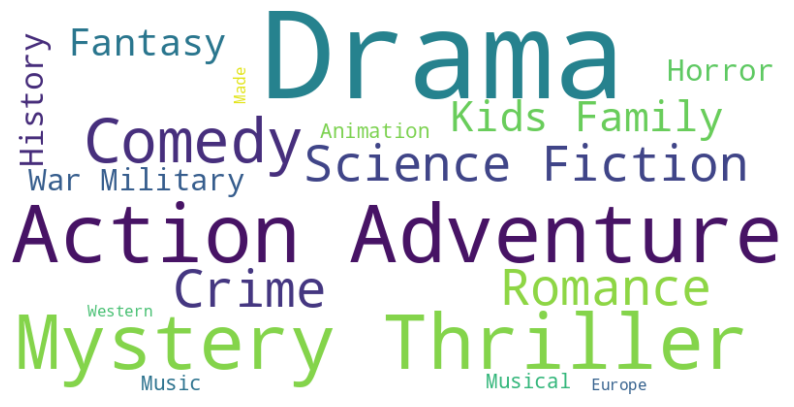

In [ ]:
# Let's Visvalize it using word cloud
# Extract values from the column
text = ' '.join(movie_df_copy['Genre'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Finding the top Genre in TV Shows
genre_tv_df = pd.DataFrame(tv_df_copy['Genre'].value_counts()).reset_index().rename(columns = {'index':'Genre','Genre':'Count'}).sort_values(by = 'Count', ascending = False)
genre_tv_df

,Genre,Count
0,"Crime, Drama, Mystery & Thriller",8
1,Drama,7
2,"Drama, Crime, Mystery & Thriller",4
3,"Drama, Mystery & Thriller",4
4,Comedy,4
...,...,...
35,"Action & Adventure, Science-Fiction, Comedy, D...",1
36,"Reality TV, Sport",1
37,"Animation, Action & Adventure, Science-Fiction...",1
38,"Science-Fiction, Drama, Action & Adventure, Co...",1


**The top genre in TV Show is 'Crime, Drama, Mystery & Thriller'.**

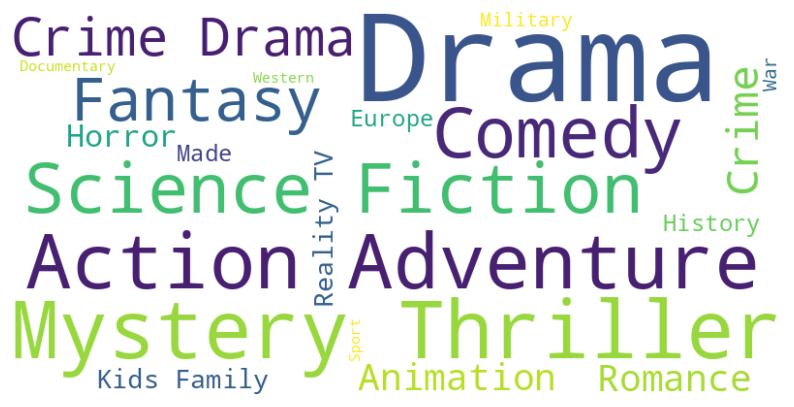

In [ ]:
# Let's Visvalize it using word cloud
# Extract values from the column
text = ' '.join(tv_df_copy['Genre'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Finding Predominant Streaming Service**

In [ ]:
# Write Your Code here
# Finding the predominant streaming service in Movies
stream_movie_df = pd.DataFrame(movie_df_copy['Streaming Details'].value_counts()).reset_index().rename(columns = {'index':'Streaming Details','Streaming Details':'Count'}).sort_values(by = 'Count', ascending = False)
stream_movie_df

,Streaming Details,Count
0,NA,29
1,Netflix,24
2,Amazon Prime Video,21
3,Hotstar,8
4,Jio Cinema,8
5,Zee5,3
6,Apple TV Plus,2
7,Lionsgate Play,2
8,Sun Nxt,1
9,Voot,1


**The predominant streaming service in Movies is 'Netflix'.**

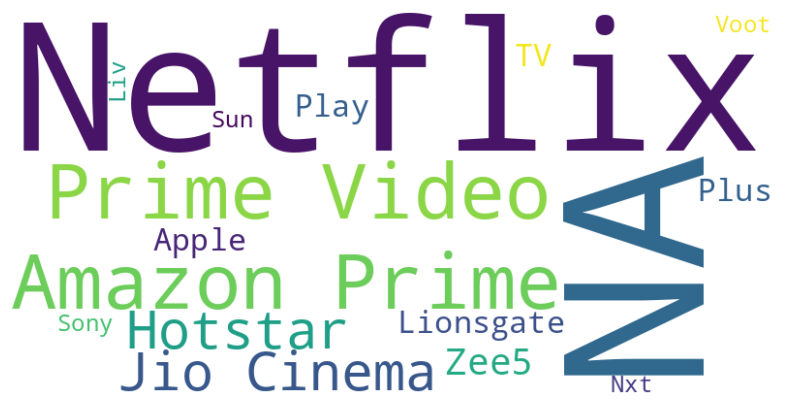

In [ ]:
# Let's Visvalize it using word cloud
# Extract values from the column
text = ' '.join(movie_df_copy['Streaming Details'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Write Your Code here
# Finding the predominant streaming service in Tv Shows
stream_tv_df = pd.DataFrame(tv_df_copy['Streaming Details'].value_counts()).reset_index().rename(columns = {'index':'Streaming Details','Streaming Details':'Count'}).sort_values(by = 'Count', ascending = False)
stream_tv_df

,Streaming Details,Count
0,Netflix,34
1,Amazon Prime Video,17
2,Hotstar,11
3,Jio Cinema,8
4,NA,8
5,Sony Liv,7
6,Voot,3
7,Apple TV Plus,3
8,Lionsgate Play,3
9,Crunchyroll,2


**The predominant streaming service in TV Show is 'Netflix'.**

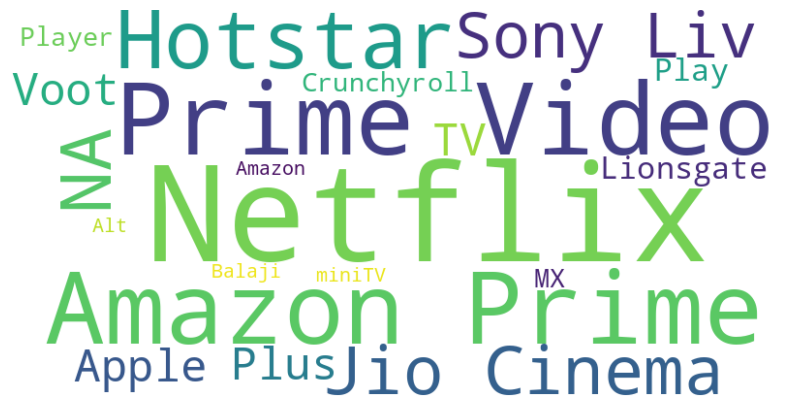

In [ ]:
# Let's Visvalize it using word cloud
# Extract values from the column
text = ' '.join(tv_df_copy['Streaming Details'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format
movie_df.to_csv('movie_final.csv',index=False)
tv_df.to_csv('tv_final.csv',index=False)

In [ ]:
#saving filter data as Filter Data in csv format
movie_df_copy.to_csv('movie_filter.csv',index=False)
tv_df_copy.to_csv('tv_filter.csv',index=False)

# **Dataset Drive Link (View Access with Anyone) -**

https://drive.google.com/drive/folders/1F1ciTQCYJmFvKWq_M6Ha8WTsONj71cfS?usp=sharing

# ***Congratulations!!! You have completed your Assignment.***